# 66-70. 選挙のデータ解析

[2012年のアメリカ大統領選挙](https://ja.wikipedia.org/wiki/2012%E5%B9%B4%E3%82%A2%E3%83%A1%E3%83%AA%E3%82%AB%E5%90%88%E8%A1%86%E5%9B%BD%E5%A4%A7%E7%B5%B1%E9%A0%98%E9%81%B8%E6%8C%99)

基本的には民主党のオバマ候補と、共和党のロムニー候補の争いで、オバマ候補が勝利。

最初は世論調査結果のデータを扱う。
以下の問題を設定する。
```
1.) どのような人達が調査対象だったか？
2.) 調査結果は、どちらの候補の有利を示しているか？
3.) 態度未定の人達が世論調査に与えた影響は？
4.) また、態度未定の人たちの動向は？
5.) 投票者の気持ちは、時間ともにどう変化したか？
6.) 討論会の影響を世論調査の結果から読み取ることができるか？
```

In [10]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

データは、HuffPost Pollsterから持ってくる。
[サイト](http://elections.huffingtonpost.com/pollster)

（米国の選挙のデータだが、このコースが終わったあとにこのサイトの別のデータを解析するのにチャレンジしてみるのもいいかもしれない）

Webからデータを取ってくるのに便利なrequestsモジュールを使う。

また、CSV形式のテキストデータをファイルのように扱うためにStringIOを使う。

In [11]:
# Webからデータを取得するために、requestsをインポート
import requests

In [3]:
# CSVデータを扱うために、StringIOを使う
from io import StringIO

In [12]:
# データのURL
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsを使ってデータをtextとして取得する
source = requests.get(url).text

# StringIOを使ってpandasのエラーを防ぐ
poll_data = StringIO(source)

In [13]:
# DataFrameにする
poll_df = pd.read_csv(poll_data)

In [14]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [15]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


支持政党で分類する。アメリカは2大政党制で、大きく共和党（the Republican party)と民主党（the Democratic party）に分けられる。

In [18]:
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort('Pollster').drop_duplicates()

/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
122,Bloomberg,Nonpartisan,None
63,CBS,Nonpartisan,None
415,CBS/Times,Nonpartisan,None
504,CNN,Nonpartisan,None
568,Clarus,Nonpartisan,None


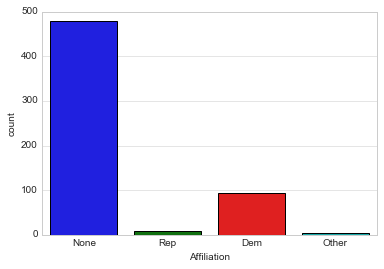

In [19]:
# Affiliationで数を分類する
sns.countplot('Affiliation', data = poll_df)

概ね中立の方に見えるが、民主党寄りの調査主体が多いようにも見える。
このことは頭に入れておいていいかもしれない。調査対象の人々の属性で層別化する。

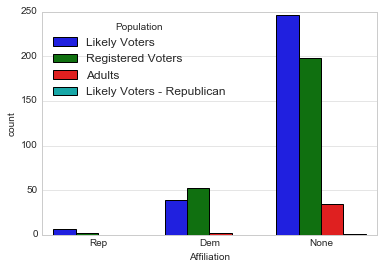

In [20]:
sns.countplot('Affiliation', data = poll_df, hue = 'Population', order = ['Rep', 'Dem', 'None'])

概ね、選挙の投票に関連のある人々を対象にしているので、調査結果は信頼できそう。

オバマ、ロムニー、未定の3つの選択肢について、それぞれ平均的な支持率を計算してみる。

In [39]:
# 平均をとる
avg = pd.DataFrame(poll_df.mean())

In [40]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [41]:
# 平均をとると、数値の列だけが残るので、いらないNumber of Observationsを削除する
avg.drop(['Number of Observations', 'Other', 'Question Text', 'Question Iteration'], axis = 0, inplace = True)
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [42]:
std = pd.DataFrame(poll_df.std())

In [43]:
std

,0
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


In [44]:
std.drop(['Number of Observations', 'Other', 'Question Text', 'Question Iteration'], axis = 0, inplace = True)

In [45]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


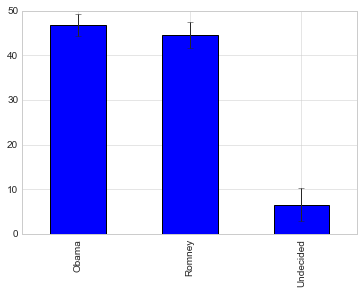

In [46]:
# pandas標準のplotで描画する。エラーバーも付けておく
avg.plot(yerr = std, kind = 'bar', legend = False)

In [47]:
# 平均と標準偏差のDataFrameを連結する。
poll_avg = pd.concat([avg, std], axis = 1)

# 名前を変えておく
poll_avg.columns = ['Average', 'STD']
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


非常に接戦の選挙戦に見える。
ただ、未定の人達は、いざ投票が始まれば、どちらかに投票することになるので、その動向が注目される。
ここはひとまず、未定の人達が、半分ずつ、両候補へ分かれると仮定して、選挙戦の最終的な結果を推定してみる。

In [48]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


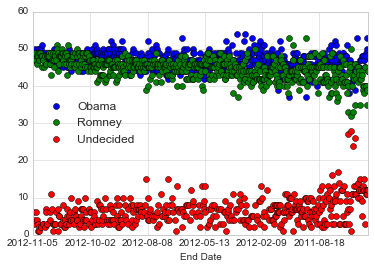

In [49]:
# 時間毎に、支持率をプロットする
poll_df.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided'], marker = 'o', linestyle = '')

少し見にくいので、両陣営の支持率の差を可視化するには、新しいデータを作って解析したほうが早そう。

時間と共に変化する支持率を、datetimeモジュールを使って、時系列のデータとして扱ってみる。

In [51]:
from datetime import datetime

オバマとロムニーの支持率の差を計算し、新しい列に保存する。

In [52]:
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney) / 100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


これを使って、支持率の差が時間と共にどう変化したのかを計算する。

同じ期間に行われた調査もあるので、groupbyを使って、データを整理する。
（同じ日に行われた調査については平均値をとる）

In [53]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


時間と共に、支持率がどう変化したのかを端的に可視化出来る。

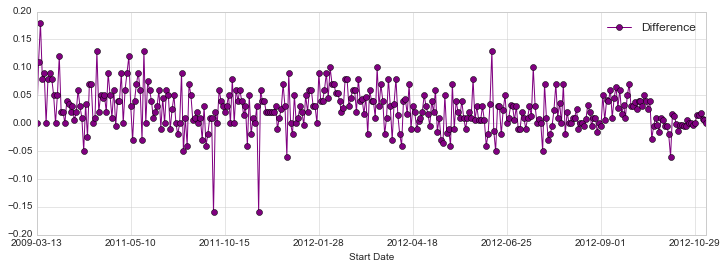

In [55]:
fig = poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-', color = 'purple')

候補者同士の討論会があった日付を、このプロットに書き込むと面白いかもしれない。

2012年の討論会があったのは、10/3、10/11、10/22。これを書き込む。

2012年の10月が、x軸上のいくつ目のデータなのかを知る必要がある。
ここは単純に2012年10月のデータを見て、どのindexを取ればいいのか確認することにする。

In [57]:
poll_df[poll_df['Start Date'].apply(lambda x:x.startswith('2012-10'))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000


3日はデータが無いので、2日にする。なので、326, 333, 343。

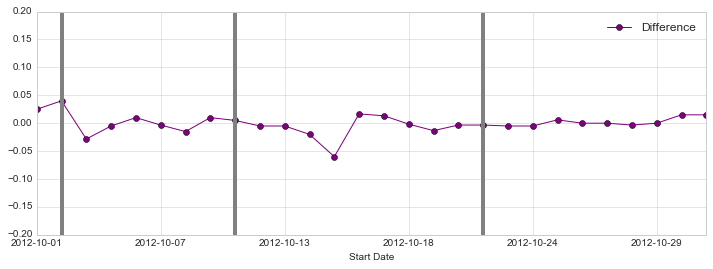

In [59]:
# まずは10月に限定したplot
fig = poll_df.plot('Start Date', 'Difference', figsize = (12, 4), marker = 'o', linestyle = '-', color = 'purple', xlim = (325, 352))

# 討論会の日程を書き込む
plt.axvline(x=326, linewidth=4, color='grey')
plt.axvline(x=333, linewidth=4, color='grey')
plt.axvline(x=343, linewidth=4, color='grey')

こうしたデータを解釈する際は、様々な要因に注意を払う必要もある。
例えば、これらの世論調査が全米のどの場所で行われたかなども、世論調査の結果に大きく影響する。

-----

## 寄付のデータ

両陣営への寄付に関するデータを分析する。[データ](https://www.dropbox.com/s/ltyfa5eba9a4tcm/Election_Donor_Data.csv?dl=0)

このデータは、次の視点から分析を進める。

```
1.) 寄付の金額とその平均的な額
2.) 候補者ごとの寄付の違い
3.) 民主党と共和党での寄付の違い
4.) 寄付した人々の属性について
5.) 寄付の総額になんらかのパターンがあるか？
```

In [62]:
# CSV形式のデータを読み込んで、DataFrameを作る。
donor_df = pd.read_csv('Election_Donor_Data.csv')

/Users/kymatsum/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [63]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [64]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


まずは、寄付の総額と平均的な額を計算してみることにする。

In [65]:
# 寄付の額をざっと眺めてみる。
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 128.68          1
 60.71           1
 139.68          1
 143.43          1
 155.43          1
 160.93          1
 190.68          1
 195.18          1
 198.18          1
 62.46           1
 93.88           1
 101.88          1
 34.46           1
 25.96           1
 26.21           1
 28.96           1
 29.46           1
 30.46           1
 31.96           1
 33.71           1
 36.46           1
 54.71      

In [66]:
# 寄付の平均的な額
don_mean = donor_df['contb_receipt_amt'].mean()

# 標準偏差
don_std = donor_df['contb_receipt_amt'].std()

print('寄付の平均は{:0.2f}ドルで、その標準偏差は{:0.2f}です。'.format(don_mean, don_std))

寄付の平均は298.24ドルで、その標準偏差は3749.67です。


ものすごく大きな標準偏差。分布の形が偏っていることが予想される。

In [69]:
# DataFrameの1列から、Seriesを作る。
top_donor = donor_df['contb_receipt_amt'].copy()

# ソートする
top_donor.sort_values(inplace = True)
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

負の数や、非常に大きな値が見える。
負の数は、払い戻しのデータなので、ひとまず正の数だけに注目することにする。

In [73]:
# 負の数を取り除く
top_donor = top_donor[top_donor > 0]

# ソートする
top_donor.sort_values(inplace = True)

# よく寄付される額Top10を見てみる
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

Top10でも10ドルから2500ドルまで幅広い。

寄付の額は10や50など、キリの良い数字が多いのかどうか気になる。
ヒストグラムを描いて、2500ドルまでのデータを調べてみる。

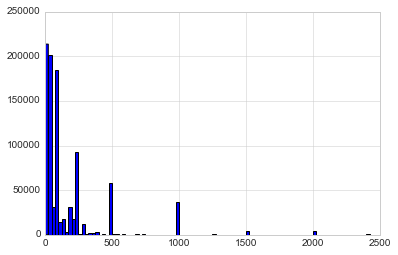

In [74]:
# 2500ドルまでの寄付のデータを取り出す
com_don = top_donor[top_donor < 2500]

# binを細かくして、キリの良い数字にピークがあるか、見てみる
com_don.hist(bins = 100)

-----

西洋毎に寄付の額をまとめてみる。これを見るには、まず候補者のデータに注目して、候補者の所属政党でデータを分類することを試みる。

In [75]:
# 重複のない候補者のデータを作っておく
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

新たに、Party列を作る。
候補者の所属政党のデータを保管する辞書を作って、一気にDataFrameを更新する。

In [76]:
# 所属政党の辞書
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# 以下のコードで、DataFrame全体を更新できる。
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [77]:
# 払い戻しを除去
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


候補者毎に寄付の額をまとめる。はじめに、寄付の件数から。

In [78]:
# 候補者の名前でグループ化したあと、それぞれの寄付件数を表示する
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

オバマの圧勝。
彼は民主党からの唯一の候補者なので、寄付が集まっている。寄付の額を見てみる。

In [79]:
# グループ化したあと、今度は寄付の総額を表示する。
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

少し読みにくいので、結果を整形する。

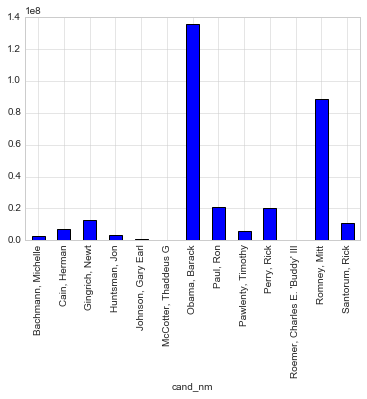

In [81]:
# データの準備です。
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# 棒グラフ
cand_amount.plot(kind = 'bar')

オバマ候補だけで100億以上の寄付が集まっている。

今度は政党別に比較する。

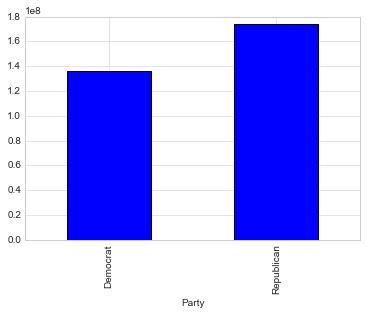

In [82]:
# 政党毎の寄付の額
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind = 'bar')

民主党（Democrat）はオバマ候補1人なので、政党の比較では共和党優勢だが、
共和党候補者達は、この額をみんなで分けているので、個人でみると厳しい情勢。

最後に、寄付した人達の職業をまとめる。

まず、職業のデータを元のDataFrameから抜き出して、これをもとに、ピボットテーブルを作る。
このとき、職業ごとに民主党と共和党への寄付額が分かるようにする。
最後にこれらのデータをまとめて、寄付者の属性ごとの寄付額を算出する。

In [86]:
# 職業ごとに、政党別に分けて寄付額をまとめる
occupation_df = donor_df.pivot_table('contb_receipt_amt', 
                                     index = 'contbr_occupation', 
                                     columns = 'Party', aggfunc = 'sum')

In [87]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [88]:
occupation_df.shape

(45067, 2)

4万5千以上の職種があるようで、簡単には描画できそうにない。
閾値を決めて、寄付の総額が小さい職種については、表示を省略する。

In [89]:
# 百万ドル（約1億2千万）をひとつの区切りにする
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.shape

(31, 2)

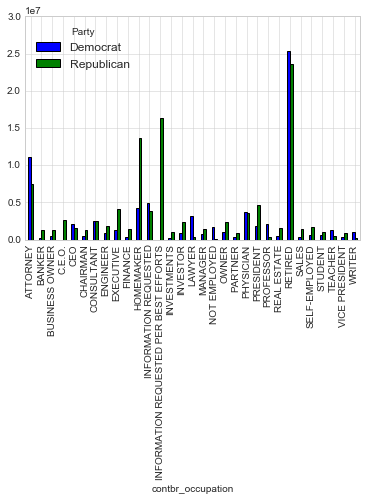

In [90]:
# これならグラフに出来る
occupation_df.plot(kind = 'bar')

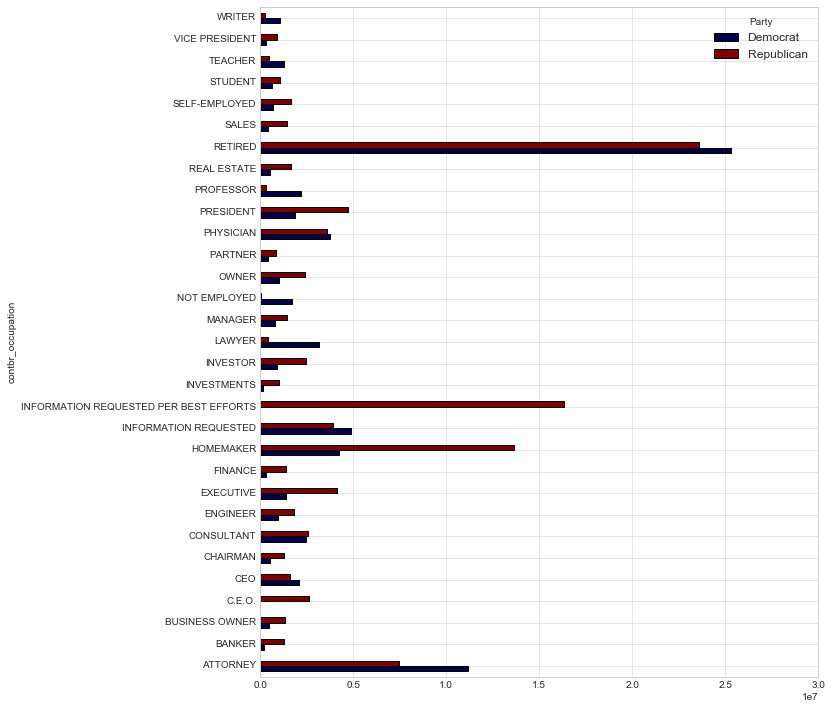

In [92]:
# 横向きにする
occupation_df.plot(kind = 'barh', figsize = (10, 12), cmap = 'seismic')

In [93]:
occupation_df

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
BANKER,224084.40,1.259469e+06
BUSINESS OWNER,449979.30,1.323342e+06
C.E.O.,1690.00,2.592983e+06
CEO,2073284.79,1.618057e+06
CHAIRMAN,496547.00,1.296093e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06


色々と粗が目立つ。ひとまず、「Information Requested」を取り除いて、「CEO」と「C.E.O.」を1つにまとめる。

In [94]:
# 無効な回答を取り除きます。
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

CEOとC.E.Oをまとめる。

In [96]:
# CEOにまとめる
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
# C.E.O.を消す
occupation_df.drop('C.E.O.',inplace=True)

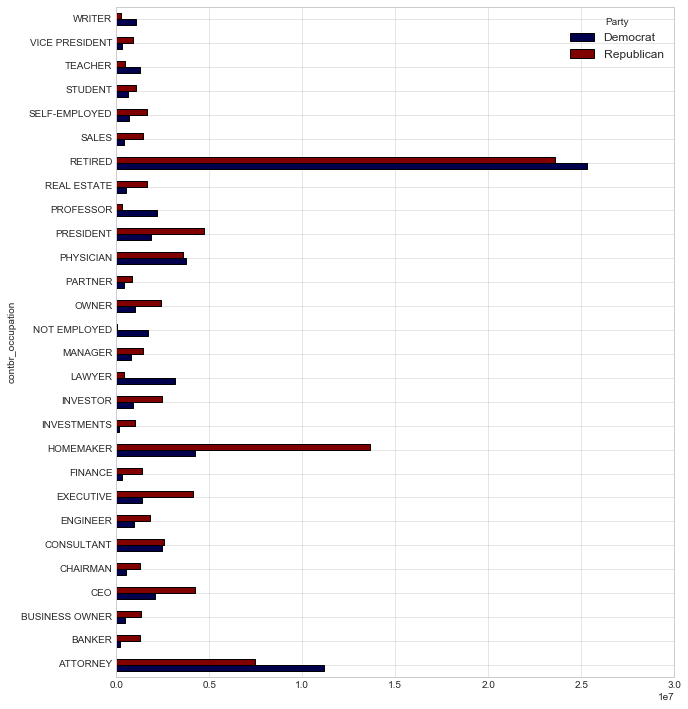

In [97]:
# 再描画
occupation_df.plot(kind = 'barh', figsize = (10, 12), cmap = 'seismic')

CEO（企業経営者）は、保守的な思想の持ち主のように見える。両党の税に対する考え方が反映されているのかもしれない。

日本でも、選挙に関するデータ解析の事例がある。 http://event.yahoo.co.jp/bigdata/senkyo201307/